In [1]:
!wget https://gist.githubusercontent.com/ZohebAbai/513218c3468130eacff6481f424e4e64/raw/b70776f341a148293ff277afa0d0302c8c38f7e2/gist_stopwords.txt

--2023-10-30 10:47:52--  https://gist.githubusercontent.com/ZohebAbai/513218c3468130eacff6481f424e4e64/raw/b70776f341a148293ff277afa0d0302c8c38f7e2/gist_stopwords.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6271 (6.1K) [text/plain]
Saving to: ‘gist_stopwords.txt’

gist_stopwords.txt  100%[===================>]   6.12K  --.-KB/s    in 0s      

2023-10-30 10:47:52 (69.8 MB/s) - ‘gist_stopwords.txt’ saved [6271/6271]



In [2]:
!git clone https://github.com/Inixius/Chairman-Speech.git

Cloning into 'Chairman-Speech'...
remote: Enumerating objects: 134, done.
remote: Total 134 (delta 0), reused 0 (delta 0), pack-reused 134
Receiving objects: 100% (134/134), 620.80 KiB | 5.91 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [3]:
! pip install -q simpletransformers
! pip install --upgrade -q simpletransformers
! pip install --upgrade -q transformers
! pip install -q wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.8/250.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 84.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 104.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 22.8 MB/s et

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os

In [6]:
# Create a curated list that contains all alphanumeric words and special characters with their respective tags
# Also, remove all sentences where there are only "O" tags, but only if its train data

def process(folder_path, file_list, train = 0):
  lines_list = []
  sentence = []
  for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    with open(file_path, 'r', encoding = 'utf-8') as file:

      # Extracting the contents line by line
      for line in file:
        columns = line.strip().split()
        sentence.append(columns)

        if len(columns) >= 2:

          # Make a line with only the word and the tag separated by a single space character
          formatted_line = f"{columns[0]} {columns[-1]}"

          lines_list.append(formatted_line)

        # Remove sentences that have only "O" tags in them
        elif train == 1:
          lines_list.append("")
          for i in range(len(sentence)-1):
            if sentence[i][-1][0] != 'O':
              break
            elif i == len(sentence)-2:
              for j in range(len(sentence)):
                lines_list.pop()
          sentence = []

        else:
          lines_list.append("")

  return lines_list

In [7]:
# # Create a curated list that contains ONLY alphanumeric words with their respective tags

# def preprocess(folder_path, file_list):
#   curated_list = []
#   for file_name in file_list:
#     file_path = os.path.join(folder_path, file_name)
#     with open(file_path, 'r', encoding = 'utf-8') as file:

#       # Extracting the contents line by line
#       for line in file:
#         columns = line.strip().split()

#         if len(columns) >= 2:

#           # Check if the word is alphanumeric
#           if columns[0].isalnum():

#             # Make a line with only the word and the tag separated by a single space character
#             formatted_line = f"{columns[0]} {columns[-1]}"

#             curated_list.append(formatted_line)

#   return curated_list

In [8]:
# Create a curated list of train data and validation data

directory_train = "/content/Chairman-Speech/Train"
directory_val = "/content/Chairman-Speech/Validation"
files_train = os.listdir(directory_train)
files_val = os.listdir(directory_val)

curated_list_train = process(directory_train, files_train, 1)
curated_list_val = process(directory_val, files_val)

In [9]:
# # Remove all special characters

# final_train = []
# for i in curated_list_train:
#   if i.split()[0].isalnum():
#     final_train.append(i)

# final_val = []
# for i in curated_list_val:
#   if i[0].isalnum():
#     final_val.append(i)

In [10]:
gist_file = open("gist_stopwords.txt", "r")
content = gist_file.read()
stopwords = content.split(",")
stopwords = [i.replace('"', "").strip() for i in stopwords]
gist_file.close()

In [11]:
# Remove stopwords and numbers

def is_number(s):
  try:
    float(s)
    return True # Returns true if the value can be converted into a float data type

  except ValueError:
    return False # Returns false if the value is alphanumeric

def remove_stopwords(lst):
  new = []
  for i in lst:

    if len(i.split()) == 2:
      if i.split()[0].lower() not in stopwords and is_number(i.split()[0]) == False:
        new.append(i)

    else:
      new.append("")

  return new

final_train = remove_stopwords(curated_list_train)
final_val = remove_stopwords(curated_list_val)

In [12]:
# Value counts of the tags

def count(lst):
  tag_counts = {'O': 0, 'B-key': 0, 'I-key': 0}
  for item in lst:
    if len(item) >= 2:
      parts = item.split()
      tag = parts[1]
      if tag in tag_counts:
        tag_counts[tag] += 1

  for tag, count in tag_counts.items():
    print(f'{tag} - {count}')
  return

print("Value Counts of tags in train data before removing stopwords")
count(curated_list_train)
print("\nValue Counts of tags in train data after removing stopwords")
count(final_train)
print("\nValue Counts of tags in val data before removing stopwords")
count(curated_list_val)
print("\nValue Counts of tags in val data after removing stopwords")
count(final_val)

Value Counts of tags in train data before removing stopwords
O - 53469
B-key - 3364
I-key - 2315

Value Counts of tags in train data after removing stopwords
O - 28093
B-key - 3233
I-key - 1974

Value Counts of tags in val data before removing stopwords
O - 31414
B-key - 1003
I-key - 581

Value Counts of tags in val data after removing stopwords
O - 17429
B-key - 981
I-key - 522


In [13]:
# Write the curated lists into a .txt format

with open("/content/Chairman-Speech/train.txt", "w", encoding = 'utf-8') as file:
    for item in final_train:
        file.write(item + "\n")

with open("/content/Chairman-Speech/val.txt", "w", encoding = 'utf-8') as file:
    for item in final_val:
        file.write(item + "\n")

In [14]:
# Intialize the model and its arguments

from simpletransformers.ner import NERModel, NERArgs

model_args = NERArgs()
model_args.train_batch_size = 32
model_args.evaluate_during_training = True
model_args.num_train_epochs = 10

tag_list = ["O", "B-key", "I-key"]

model = NERModel("roberta", "roberta-base", use_cuda = True, labels = tag_list, args = model_args)

Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
model.train_model('/content/Chairman-Speech/train.txt', eval_data='/content/Chairman-Speech/val.txt', args={"overwrite_output_dir": True})

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/61 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/160 [00:00<?, ?it/s]

Running Epoch 1 of 10:   0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/160 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/160 [00:00<?, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/160 [00:00<?, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/160 [00:00<?, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/160 [00:00<?, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/160 [00:00<?, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/160 [00:00<?, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/160 [00:00<?, ?it/s]

Running Epoch 9 of 10:   0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/160 [00:00<?, ?it/s]

(610,
 defaultdict(list,
             {'global_step': [61, 122, 183, 244, 305, 366, 427, 488, 549, 610],
              'train_loss': [0.2543967664241791,
               0.2646588683128357,
               0.2957853674888611,
               0.18711449205875397,
               0.14259308576583862,
               0.14182695746421814,
               0.12502580881118774,
               0.07603819668292999,
               0.0890420526266098,
               0.05723633989691734],
              'eval_loss': [0.22997308243066072,
               0.27928675287403165,
               0.2430504359304905,
               0.2456941909622401,
               0.3035640516784042,
               0.29038794059306383,
               0.314141939394176,
               0.3526684240438044,
               0.37717787120491264,
               0.3860694586765021],
              'precision': [0.28125,
               0.2787583688374924,
               0.3231270358306189,
               0.3238786279683377,
               

In [16]:
train_losses = [0.2543967664241791,
               0.2646588683128357,
               0.2957853674888611,
               0.18711449205875397,
               0.14259308576583862,
               0.14182695746421814,
               0.12502580881118774,
               0.07603819668292999,
               0.0890420526266098,
               0.05723633989691734]

eval_losses = [0.22997308243066072,
               0.27928675287403165,
               0.2430504359304905,
               0.2456941909622401,
               0.3035640516784042,
               0.29038794059306383,
               0.314141939394176,
               0.3526684240438044,
               0.37717787120491264,
               0.3860694586765021]

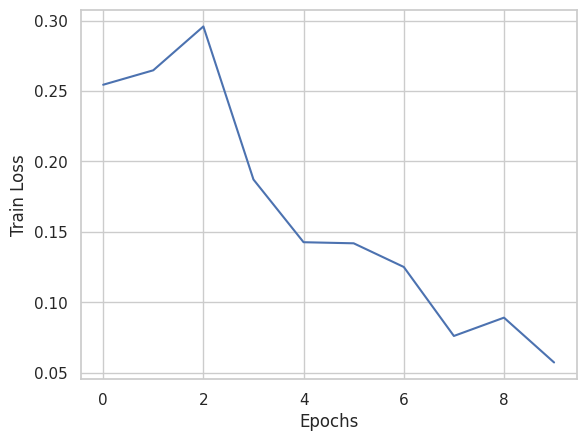

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
sns.lineplot(x=range(len(train_losses)), y=train_losses)

plt.xlabel("Epochs")
plt.ylabel("Train Loss")

plt.show()

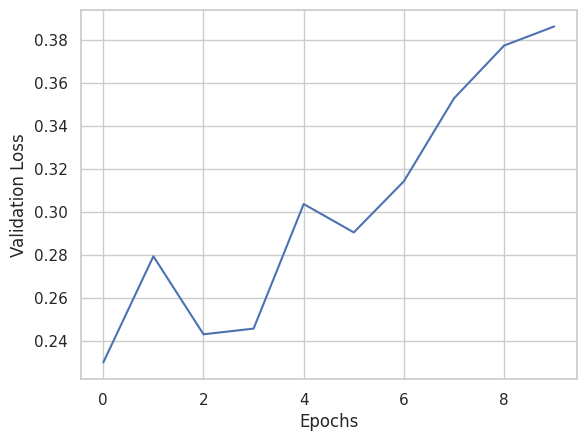

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
sns.lineplot(x=range(len(eval_losses)), y=eval_losses)

plt.xlabel("Epochs")
plt.ylabel("Validation Loss")

plt.show()

In [19]:
# # Evaluate the validation data one sentence at a time and store the model results for it in a list

# results = []
# sentence = []
# count = 0
# for i in curated_list_val:
#   if len(i.split()) == 2:
#     sentence.append(i)
#   else:
#     with open("/content/Chairman-Speech/sentence.txt", "w", encoding = 'utf-8') as file:
#       for item in sentence:
#           file.write(item + "\n")
#     result, model_outputs, preds_list = model.eval_model("/content/Chairman-Speech/sentence.txt")
#     results.append(result)
#     sentence = []
#     count += 1
#     if count == 50: # Evaluate 50 sentences
#       break

# for i in results:
#   print(i)

In [20]:
result, model_outputs, preds_list = model.eval_model('/content/Chairman-Speech/train.txt')
result

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/242 [00:00<?, ?it/s]

{'eval_loss': 0.05548677712867483,
 'precision': 0.8773201856148491,
 'recall': 0.9219750076196281,
 'f1_score': 0.8990934759994056}

In [21]:
result, model_outputs, preds_list = model.eval_model('/content/Chairman-Speech/val.txt')
result

  0%|          | 0/2 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/160 [00:00<?, ?it/s]

{'eval_loss': 0.3860694586765021,
 'precision': 0.32042882668254913,
 'recall': 0.5434343434343434,
 'f1_score': 0.40314724615961034}

In [23]:
model.args

NERArgs(adafactor_beta1=None, adafactor_clip_threshold=1.0, adafactor_decay_rate=-0.8, adafactor_eps=(1e-30, 0.001), adafactor_relative_step=True, adafactor_scale_parameter=True, adafactor_warmup_init=True, adam_betas=(0.9, 0.999), adam_epsilon=1e-08, best_model_dir='outputs/best_model', cache_dir='cache_dir/', config={}, cosine_schedule_num_cycles=0.5, custom_layer_parameters=[], custom_parameter_groups=[], dataloader_num_workers=0, do_lower_case=False, dynamic_quantize=False, early_stopping_consider_epochs=False, early_stopping_delta=0, early_stopping_metric='eval_loss', early_stopping_metric_minimize=True, early_stopping_patience=3, encoding=None, eval_batch_size=8, evaluate_during_training=True, evaluate_during_training_silent=True, evaluate_during_training_steps=2000, evaluate_during_training_verbose=False, evaluate_each_epoch=True, fp16=True, gradient_accumulation_steps=1, learning_rate=4e-05, local_rank=-1, logging_steps=50, loss_type=None, loss_args={}, manual_seed=None, max_gr

In [24]:
import torch

In [25]:
torch.save(model, "model.pth")

In [26]:
loaded_model = torch.load("/content/drive/MyDrive/exported docs/model.pth", map_location=torch.device('cpu'))
loaded_model.device = torch.device('cpu')

preds = loaded_model.predict(['India has high GDP'])
preds

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

([[{'India': 'O'}, {'has': 'O'}, {'high': 'O'}, {'GDP': 'B-key'}]],
 [[{'India': [[5.336487, -2.1980903, -4.1060486]]},
   {'has': [[5.4228044, -2.7036786, -3.8248017]]},
   {'high': [[4.2432995, -0.271355, -5.1932983]]},
   {'GDP': [[-0.7629652, 3.1560197, -2.115376],
     [-1.1148379, -1.2331095, 2.45677]]}]])

In [27]:
# # Display all the keywords that are also stopwords along with their preceding and succeeding words

# for i in range(len(curated_list_train)):
#   if len(curated_list_train[i].split()) == 2:
#     if (curated_list_train[i].split()[-1][0] == "B" or curated_list_train[i].split()[-1][0] == "I") and (curated_list_train[i].split()[0].lower() in stopwords or is_number(curated_list_train[i].split()[0]) == True):
#       print(curated_list_train[i-1], "\n", curated_list_train[i], "\n", curated_list_train[i+1])
#       print()